# Dimensionality Reduction

- Garbage in, garbase out - throughout the book, we saw this pattern also holds true when applying machine learning methods to training data. Looking back, we realize that the most interesting machine learning challenges always involved some sort of feature engineering, where we tried to use our insight into the problem to carefully crafted additional features that the machine learner hopefully picks up.

- In this chapter, we will go in the opposite direction with dimensionality reduction involving cutting away features that are irrelevant or redundant. Removing features might seem counter-intuitive at first thought, as more information should always be better than less information. Also, even if we had redundant features in out dataset, would not the learning algorithm be able to quickly fiture it out and set their weights to 0? The following are several good reasons that are still in practice for trimming down the dimensions as much as possible:

- Superflouos features can irritate or mislead the learner. This is not the case with all machine learning methods. However, most of the models feel safer with fewer dimensions.
- Another argument against high dimensional feature spaces is that more features mean more parameters to tune and a higher risk to overfit.
- The data we retrieved to solve our task might have just artificially high dimensionality, whereas the real dimension might be small.
- Fewer dimensions = faster training = more parameter variations to try out in the same time frame = better end result
- Visualization - if we want to visualize the data we are restricted to two or three dimensions.

- So, here  we will show how to get rig of the garbage within our data while keeping the real valuable part of it.

## Sketching our roadmap

- Dimensionality reduction can be roughly grouped into feature selection and feature extraction methods. We already employed some kind of feature selection in almost every chapter when we invented, analyzed, and then probably dropped some features. In this chapter, we will present some ways that use statistical methods, namely correlation and mutual information, to be able to do so in vast features spaces. Feature extraction tries to transform the original feature space into a lower-dimensional features space. This is especially useful when we cannot get rig of features using selection methods, but still we have too many features for our learner. We will demonstrate this using principal component analysis(PCA), linear discriminant analysis(LDA), and multidimensional scaling(MDS).

## Selecting features

- If we want to be nice to our machine learning algorithm, we provide it with features that are not dependent on each other, yet highly dependent on the value to be predicted. This means that each feature adds salient information. Removing any of the features will lead to a drop in performance.

- If we have only a handful of features, we could draw a matrix of scatter plots. Relationships between the features could then be easily spotted. For every feature pair showing an obvious dependence, we would then think of whether we should remove one of them or better design a newer, cleaner feature out of both.

- Most of the time, however, we have more than a handful of features to choose from. Just think of the classification task where we had a bag of words to classify the quality of an answer, which would require a 1,000 by 1,000 scatter plot. In this case, we need a more automated way to detect overlapping features and to resolve them. We will present two general ways to do so in the following subsections, namely filters and wrappers.

## Detecting redundant features using filters

- Filters try to clean up the feature forest independent of any later used machine learning method. They rely on statistical methods to find which of the features are redundant or irrelevant. In case of redundant features, it keeps only one per redundant feature group. Irrelevant features will simply be removed. In general, the filter works as depicted in the following workflow:

## Correlation

- Using correlation, we can easily see linear relationships between pairs of features. In the following graphs, we can see different degrees of correlation, together with a potential linear dependency plotted as a red-dashed line. The correlation coefficient cor(x1,x1) at the top of the individual graphs is calculated using hte common Pearson correlation coefficient by means of the pearsonr() function of scipy.stat

- Given two eqaul-sized data series, it returns a tuple of the correlation coefficient value and the p-value.

- The p-value describes how likely it is that the data series has been generated by an uncorrelated system. In other words, 

In [1]:
from scipy.stats import pearsonr

In [2]:
pearsonr([1, 2, 3], [1, 2, 3.1])

(0.99962228516121843, 0.017498096813278487)

In [3]:
pearsonr([1, 2, 3], [1, 20, 6])

(0.25383654128340477, 0.83661493668227427)

- In the first case, we have a clear indication that both series are correlated. In the second case, we still have a clearly non-zero r value.

However, the p-value of 0.84 tells us that the correlation coefficient is not significant and we should not pay too close attention to it. Have a look at the following graphs.

- In the first three cases that have high correlation coefficiens, we would probably want to throw out either x1 or x2 because they seem to convey similar, if not the same, information.

- In the last case, however, we should keep both features. In our application, this decision would, of course, be driven by this p-value.

- Although, it works nicely in the preceding example, reality is seldom nice to us. One big disadvantage of correlation-based feature selection is that it only detects linear relationships. If we use correlation on a non-linear data, we see the problem. In the following example, we have a quadratic relationship:

![main](correlation.png "main")

- Although, the human eye immediately sees the relationship between x1 and x2 in all but the bottom-right graph, the correlation coefficient does not. It's obvious that correlation is useful to detect linear relationships, but fails for everything else. Sometimes, it already helps to apply simple transformations to get a linear correlation coefficient if we had drawn x2 over x1 squared. Normal data, however, does not often offer this opportunity.

## Mutual information

- When looking at the feature selection, we should not focus on the type of relationship as we did in the previous section. Instead, we should think in terms of how much information one feature provide.

- To understand this, let's pretend that we want to use features from house\_size, number\_of\_levels, and avg\_rent\_price feature set to train classifier that outputs knowing house\_size we don't need to know number\_of\_levels anymore, as it contains, somehow, redundant information. With avg\_rent\_price, it's different because we cannot infer the value of rental space simply from the size of the house or the number of levels it has. Thus, it would be wise to keep only one of them in addition to the average price of rental space.

- Mutual information formalizes the aforementioned reasoning by calculating how much information two features have in common. However, unlike correlation, it does not rely on a sequence of data, but on the distribution. To understand how it works, we have to dive a bit into information entropy.

- Let's assume we have a fair coin. Before we flip it, we will have maximum uncertainty as to whether it will show heads or tails, as both have an equal rpobability of 50 percent. This uncertainty can be measured by means of Claude Shannon's information entropy:

$$ H(X) = -\sum^n_{i=1}p(X_i)\log_{2}p(X_i) $$

- In our fair coin case, we have two cases: Let $x_0$ be the case of head and $ x_1 $ the case of tail with $ p(X_0) = p(X_1) = 0.5 $.

In [4]:
from scipy.stats import entropy
entropy([0.5, 0.5], base=2)

1.0

In [5]:
entropy([0.6, 0.4], base=2)

0.9709505944546688

- So, what we would have to do is to calculate the normalized nutual information for all feature pairs. For every pair having to high value, we would then drop one of them. In case of regression, we could drop this feature that has too low mutual information with the desired result value.
- This might work for a not too-big set of features. At some point, however, this procedure can be really expensive, because the amount of calculation grows quadratically.

- Another huge disadvantage of filters is that they drop features that seem to be not useful in isolation. More often than not, there are a handful of features that seem to be totally independent of the target variable, yet when combined together they rock.

## Asking the model about the features using wrappers

- While filters can help tremendously in getting rid of useless features, they can go only so far. After all the filtering, there might still be some features that are independent among themselves and show some degree of dependence with the result variable, but yet they are totally useless from the model's point of view. Just think of the following data that describes the XOR function. Individually, neither A nor B would show any signs of dependence on Y, whereas together they clearly do:

- Here, we pushed the calculation of feature importance to the model training process. Unfortunately, feature importance is not deteremined as a binary, but as a ranking value. So, we still have to specify where to make the cut, what part of the features are we willing to take, and what part do we want to drop?

- Coming back to scikit-learn, we find various excellent wrapper classes in the sklearn.feature\_selection package. A real workhorse in this field is RFE, which stands for recursive feature elimination. It takes an estimator and the desired number of features to keep as parameters and then trains the estimator with various feature sets as long as it has found a subset of features that is small enough. The RFE instance itself pretends to be like an estimator, thereby, indeed, wrapping the provided estimator.

- In the following example, we create an artificial classification problem of 100 samples using dataset's convenient make\_classification() function. It lets us specify the creation of 10 features, out of which only three are really valuable to solve the classification problem:

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=10, 
                          n_informative=3, random_state=0)
clf = LogisticRegression()
clf.fit(X, y)
selector = RFE(clf, n_features_to_select=3)
selector = selector.fit(X, y)
print(selector.support_)

[False False  True False False False  True  True False False]


In [7]:
print(selector.ranking_)

[5 4 1 2 6 7 1 1 8 3]


- The problem in real-world scenarios is, of course, how can we know the right value for n\_features\_to\_select? Truth is, we can't. However, most of the time we can use a sample of the data and play with it using different settings to quickly get a feeling for the right ballpark.

## Other feature selection methods

- There are several other feature selection methods that you will discover while reading through machine learning literature. Some even don't look like being a feature selection method because they are embedded into the learning process. Decision tree, for instance, have a feature selection mechnism implanted deep in their core. Other learning methods employ some kind of regularization that punishes model complexity, thus driving the learning process towards good performing models that are still "simple". They do this by decreasing the less impactful features importance to zero and then dropping them(L1-regularization).

- So watch out! Often, the power of machine learning methods has to be attributed to their implanted feature selection method to a great degree.

## Feature extraction

- At some point, after we have removed redundant features and dropped irrelevant ones, we, often, still find that we have too many features. No matter what learning method we use, they all perform badly and given the huge feature space we understand that they actually cannot do better. We realize that we have to cut living fleshl we have to get rid of features, for which all common sense tells us that they are valueble. Another situation when we need to reduce the dimensions and feature selection does not help much is when we want to visualize data. Then, we need to have at most three dimensions at the end to provide any meaningful graphs.

- Enter feature extraction methods. They restructure the feature space to make it more accessible to the model or simply cut down the dimensions to two or three so that we can show dependencies visually.

- Again, we can distinguish feature extraction methods as being linear or non-linear ones. Also, as seen before in the *Selecting featuers* section, we will present one method for each type. Although, they are widely known and used, they are only representatives for many more interesting and powerful feature extraction methods.

## About principal component analysis

- Principal component analysis(PCA) is often the first thing to try out if you want to cut down the number of features and do not know what feature extraction methods to use. PCA is limited as it's a linear method, but chances are that it already goes far enough for your model to learn well enough. Add to this the strong mathematical properties it offers and the speed at which it finds the transformed feature space and is later able to transform between original and transformed features; we can almost guarantee that it also will become one of your frequently used machine learning tools.

- Summarizing it, given the original feature space, PCA finds a linear projection of itself in a lower dimensional space that ahs the following properties:

- The conserved variance is maximized.
- The final reconstruction error(when trying to go back from transformed features to original ones) is minimized.

- As PCA simply transforms the input data, it can be applied both to classification and regression problems. In this section, we will use a classification task to discuss the method.

## Sketching PCA

- PCA involves a lot of linear algebra, which we do not want to go into. Nevertheless, the basic algorithm can be easily described as follows:

- Center the data by subtracting the mean from it
- Calculated the covariance matrix
- Calculate the eigenvectors of the covariance matrix

- If we start with N features, then the algorithm will return a transformed feature space again with N dimensions. The nice this about this algorithm, however, is that the eigenvalues indicate how much of the variance is described by the corresponding eigenvector.

- Let's assume we start with N=1000 features and we know that our model does not work well with more than 20 features. Then, we simply pick the 20 eigenvectors with the highest eigenvalues.

## Applying PCA

In [8]:
x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = (x1 > 5) | (x2 > 5) 
bad = ~good

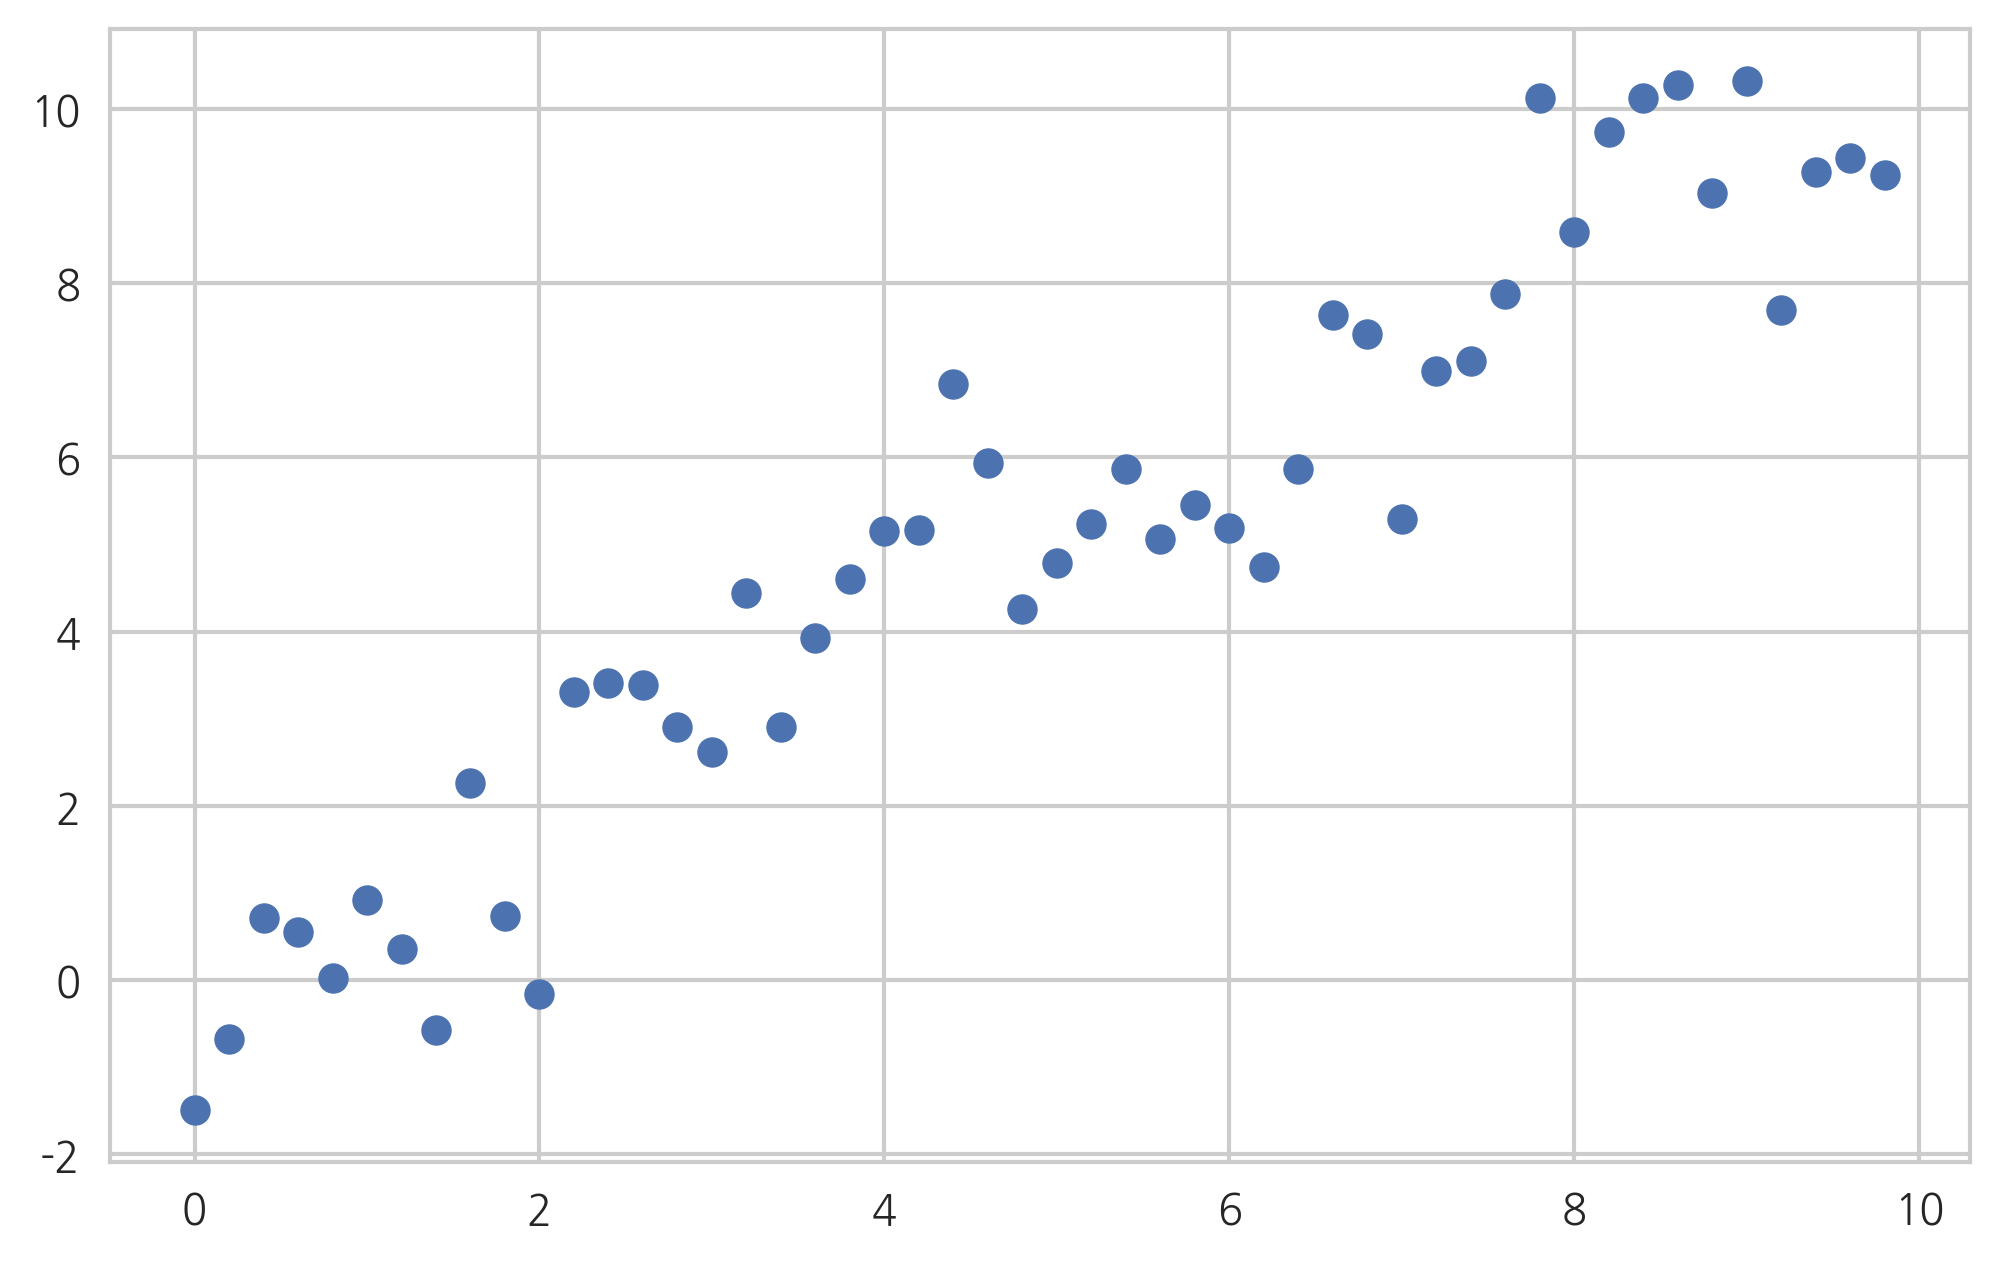

In [12]:
plt.scatter(x1, x2)

In [16]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=1)

In [17]:
Xtrans = pca.fit_transform(X)

In [19]:
Xtrans.shape

(50, 1)

In [22]:
Ytrans = np.zeros(shape=Xtrans.shape)

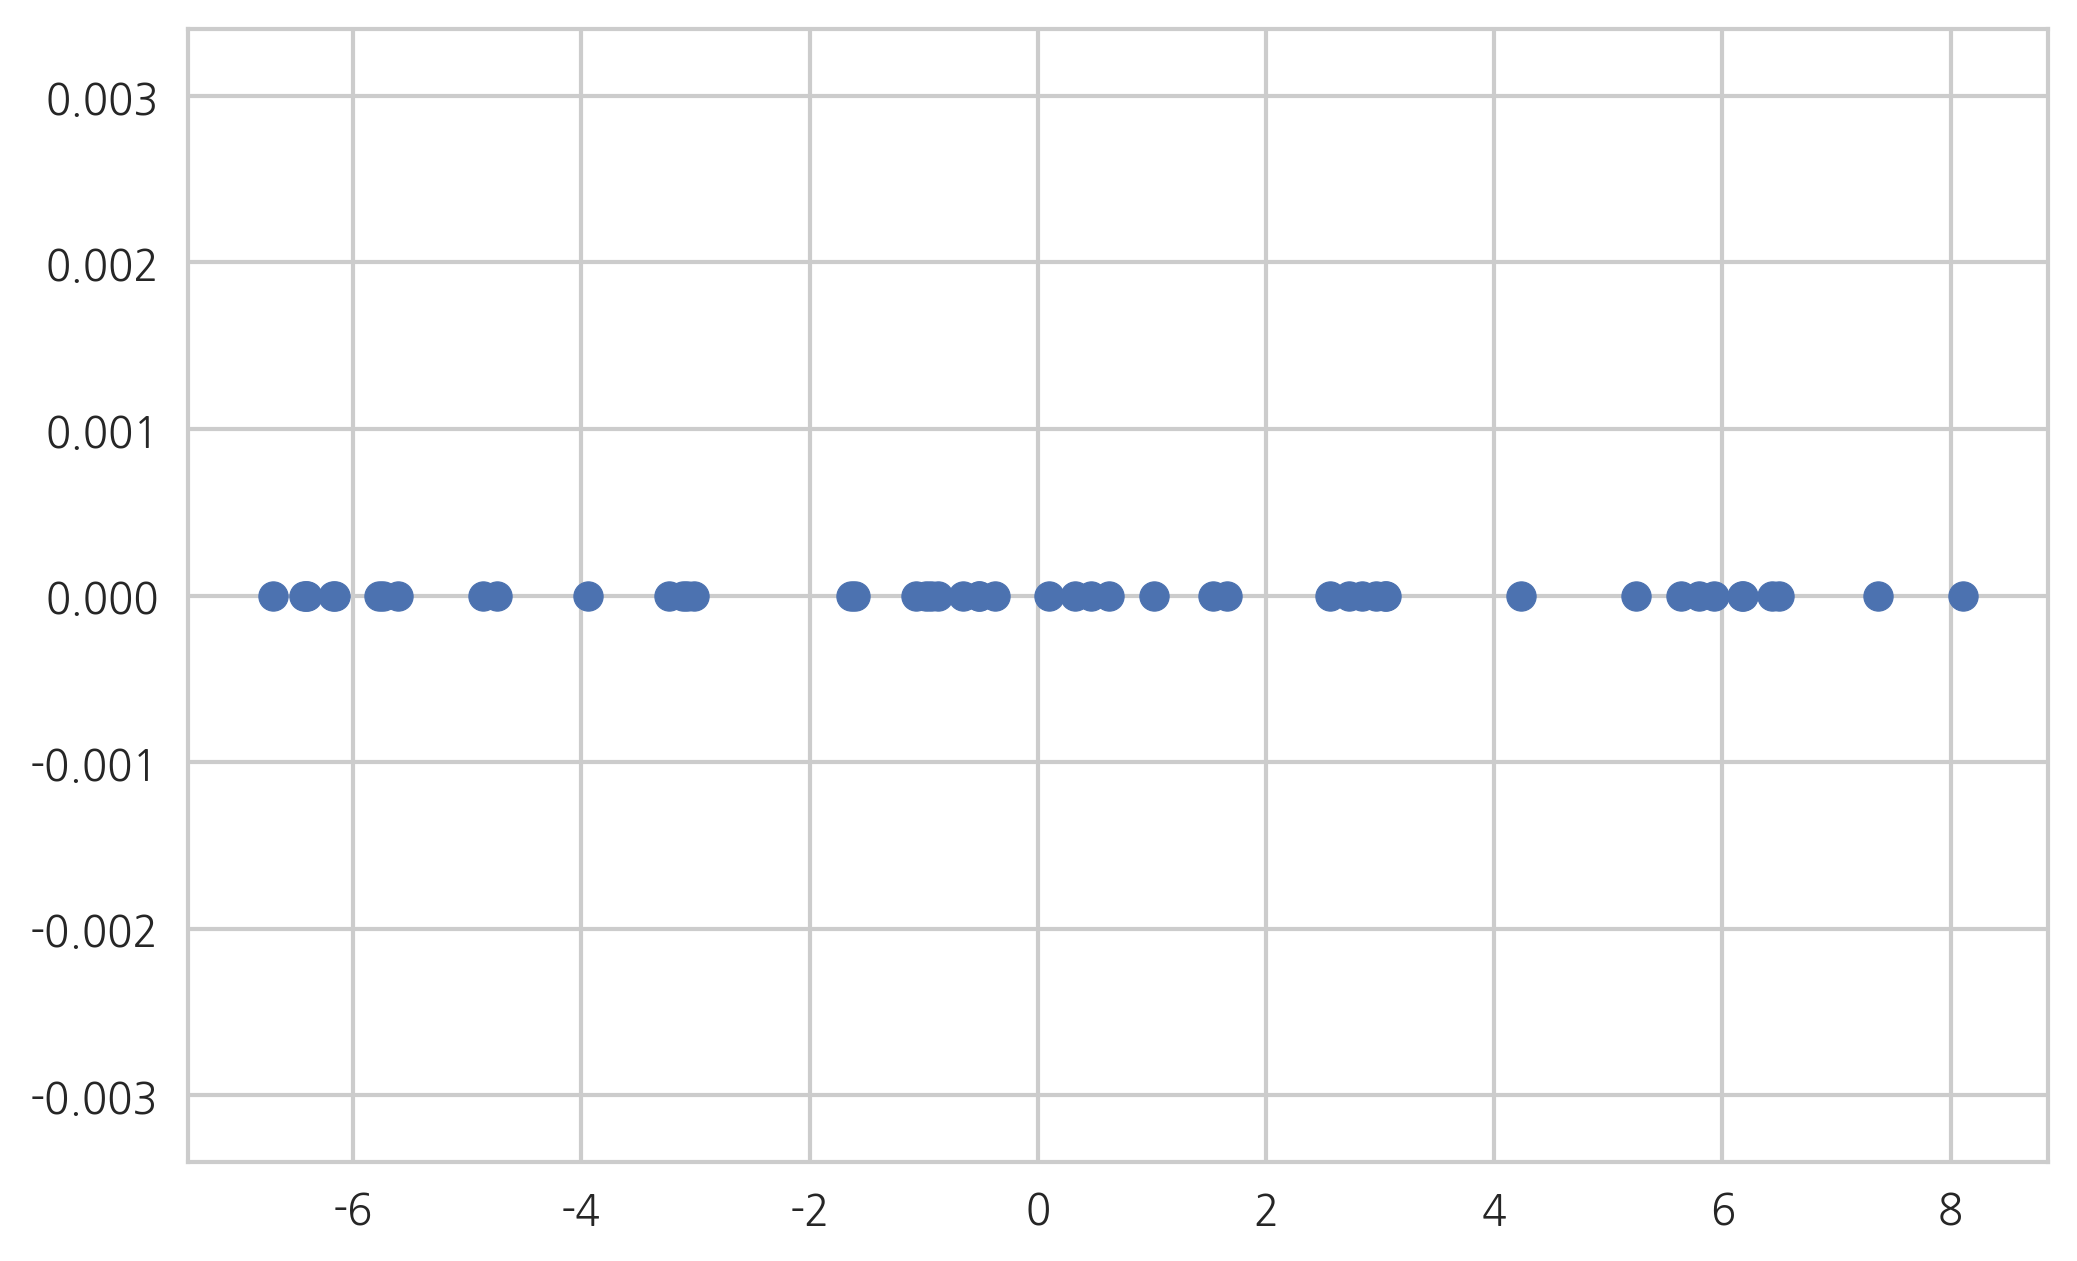

In [23]:
plt.scatter(Xtrans, Ytrans)

In [25]:
print(pca.explained_variance_ratio_)

[ 0.97510357]


** p 278 **